In [1]:
import numpy as np
from matplotlib import pyplot as plt,cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
nx = 41
ny= 41
dx = 2/(nx-1)
dy=2/(ny-1)
c=1
nt = 12
nu =0.01
sigma = 0.2
dt = sigma*dx

x= np.linspace(0,2,nx)
y= np.linspace(0,2,ny)

u=np.ones((nx,ny))
v=np.ones((nx,ny))

un=np.ones((nx,ny))
vn = np.ones((nx,ny))

u[int(0.5/dx):int(1/dx)+1,int(0.5/dy):int(1/dx)+1] = 2
v[int(0.5/dx):int(1/dx)+1,int(0.5/dy):int(1/dx)+1] = 2

Text(0.5, 0.5, '$y')

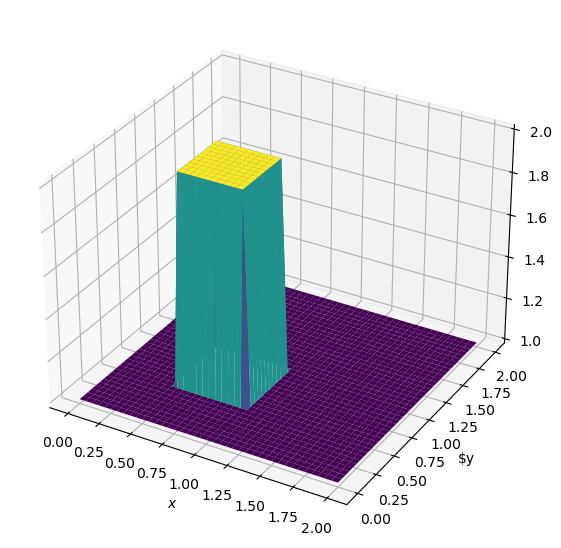

In [3]:
fig=plt.figure(figsize = (11,7),dpi=100)
ax = fig.add_subplot(111,projection='3d')
X,Y=np.meshgrid(x,y)
surf=ax.plot_surface(X,Y,u,cmap=cm.viridis)
ax.set_xlabel('$x$')
ax.set_ylabel('$y')

In [10]:
for n in range(nt): ##loop across number of time steps
    
    un = u.copy()
    vn = v.copy()

    u[1:-1,1:-1] = (u[1:-1,1:-1] - 
                    dt / dx * u[1:-1,1:-1] * (u[1:-1,1:-1] - u[0:-2,1:-1]) -
                    dt / dy * v[1:-1,1:-1] * (u[1:-1,1:-1] - u[1:-1,0:-2]) +
                   nu * dt / dx**2 * (u[2:,1:-1] - 2 * u[1:-1,1:-1] + u[:-2,1:-1]) +
                   nu * dt / dy**2 * (u[1:-1,2:] - 2 * u[1:-1,1:-1] + u[1:-1,:-2]))
    v[1:-1,1:-1] = (v[1:-1,1:-1] - 
                    dt / dx * u[1:-1,1:-1] * (v[1:-1,1:-1] - v[0:-2,1:-1]) -
                    dt / dy * v[1:-1,1:-1] * (v[1:-1,1:-1] - v[1:-1,0:-2]) +
                   nu * dt / dx**2 * (v[2:,1:-1] - 2 * v[1:-1,1:-1] + v[:-2,1:-1]) +
                   nu * dt / dy**2 * (v[1:-1,2:] - 2 * v[1:-1,1:-1] + v[1:-1,:-2]))
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
    
    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1    

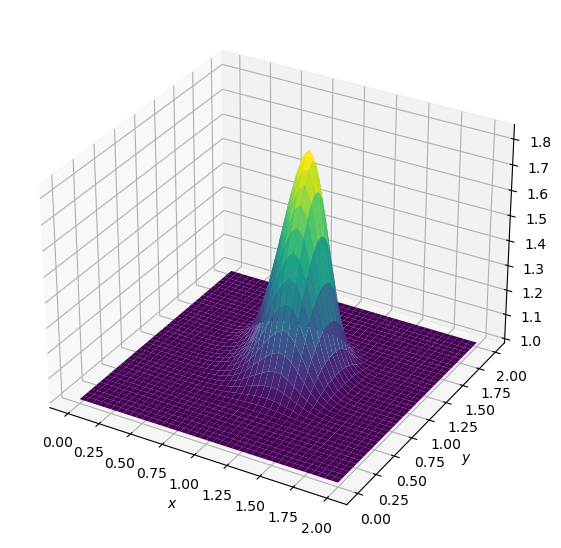

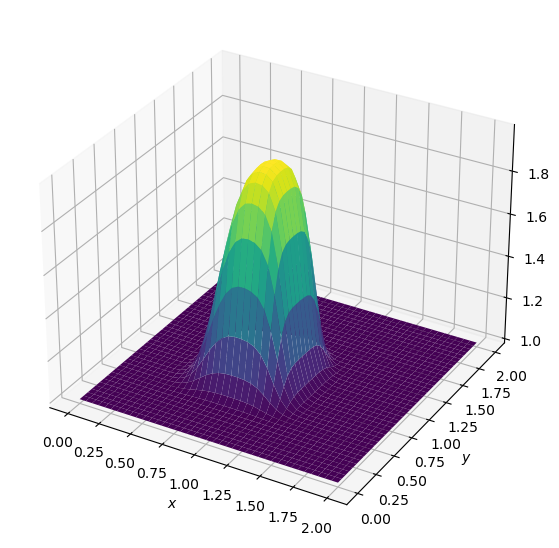

In [11]:
fig = plt.figure(figsize = (11,7), dpi=100)
ax = fig.add_subplot(111, projection='3d')
# The '111' means a grid of 1 row and 1 column and this subplot is the first one.
X, Y = np.meshgrid(x,y)
surf = ax.plot_surface(X,Y,u,cmap=cm.viridis)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

fig = plt.figure(figsize = (11,7), dpi=100)
ax = fig.add_subplot(111, projection='3d')
# The '111' means a grid of 1 row and 1 column and this subplot is the first one.
X, Y = np.meshgrid(x,y)
surf = ax.plot_surface(X,Y,v,cmap=cm.viridis)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');